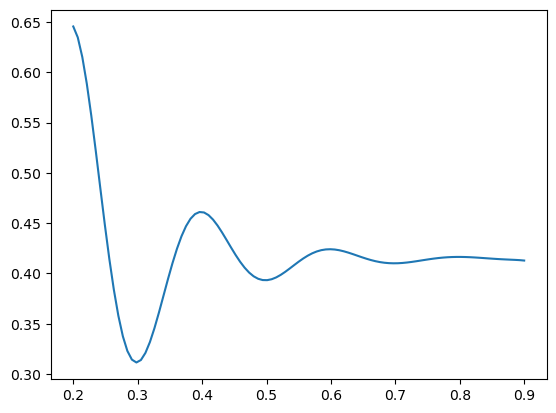

In [146]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt 

def T2R(tfactor=0.5, plot=True):

    σx = Qobj(np.array([[0,1],[1,0]]))
    σy = Qobj(np.array([[0,-1j],[1j,0]]))
    σz = Qobj(np.array([[1,0],[0,-1]]))

    π = np.pi

    ωd = 0.95e9 * 2*π # drive
    ωf = 0.9e9 * 2*π # reference frame
    ω0 = 1e9 * 2*π # natural
    Ω = 0.6e8 * 2*π

    T2R = 0.001
    ΓR = 2*π/(T2R)

    dt = (2*π)/ω0 * 0.1

    t = np.linspace(0, dt*1000, 1000+1)

    ψ = basis(2,0)

    H0 = - ω0/2 * σz

    def dual_pulse(t, tfactor):

        dt = t[1]-t[0]

        t1 = np.max(t)*0.1
        t2 = np.max(t)*tfactor
        τ = dt*50

        envelope = np.exp(-(t-t1)**2/τ**2)
        envelope += np.exp(-(t-t2)**2/τ**2)
        return envelope

    def constant(t):
        return t*0 + 1

    #select one of the two excitation pulse envelopes
    envelope = dual_pulse(t, tfactor) # If tuned to two pi/2 pulses, this becomes the Ramsey pulse sequence.
    # envelope = constant(t) # Just a constant drive

    H = [H0, [Ω/2*σx, np.cos(ωd*t)*envelope]]

    result = mesolve(H, ψ, t, e_ops = [σx, σy, σz], c_ops = [σz*ΓR])

    if plot:
        plt.plot(t,np.real(np.exp(1j*ωf*t)*(result.expect[0]+1j*result.expect[1])))
        plt.plot(t,np.imag(np.exp(1j*ωf*t)*(result.expect[0]+1j*result.expect[1])))
        plt.plot(t,result.expect[2])
    
    return result.expect[2][-1]
    
tfactors = np.linspace(0.2,0.9,101)
zfinals = tfactors*0

for i in range(0,len(tfactors)):
    zfinal = T2R(tfactor=tfactors[i], plot=False)
    zfinals[i] = zfinal
    
plt.plot(tfactors, zfinals)

0.3933107434419361

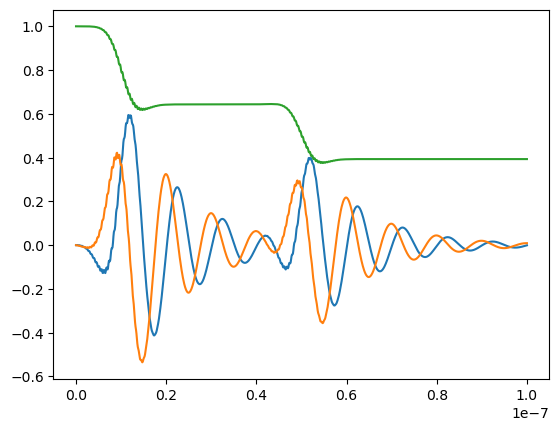

In [147]:
T2R(tfactor=0.5, plot=True)